In [1]:
import matplotlib
import pandas as pd

import matplotlib.pyplot as plt

from dsutil.plotting import add_grid

In [2]:
pd.__version__, matplotlib.__version__

('1.3.2', '3.4.3')

## Plot date histogram per month

,name,date_of_admission
0,alice,2021-10-28
1,bob,2022-01-24
2,charlie,2022-03-25
3,david,2022-04-11
4,edward,2022-03-01
5,felicia,2022-03-30


<Figure size 432x288 with 0 Axes>

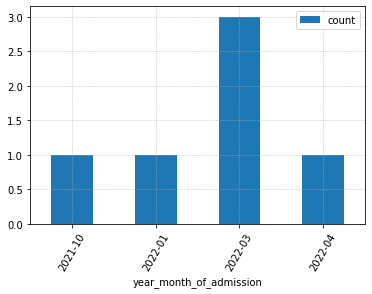

In [30]:
import pandas as pd

from IPython.display import display

plt.clf()

df = pd.DataFrame({
    'name':[
        'alice', 'bob', 'charlie', 'david', 'edward', 'felicia'
    ],
    'date_of_admission':[
        '2021-10-28', '2022-01-24', '2022-03-25', '2022-04-11', '2022-03-01', '2022-03-30'
    ],
})


display(df)

# convert column to datetime
df['date_of_admission'] = pd.to_datetime(df['date_of_admission'])

# create a representation of the month with strfmt
df['year_month_of_admission'] = df['date_of_admission'].map(lambda dt: dt.strftime('%Y-%m'))

grouped_df = df.groupby('year_month_of_admission').size().to_frame("count").reset_index()

grouped_df.plot(kind='bar', x='year_month_of_admission', y='count', rot=60)
add_grid()

## Fill missing days in between

,purchase_date,count
0,1988-12-24,1
1,1988-12-25,2
2,1988-12-26,1
3,1988-12-28,2
4,1988-12-30,1


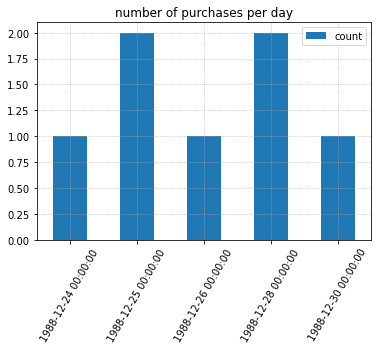

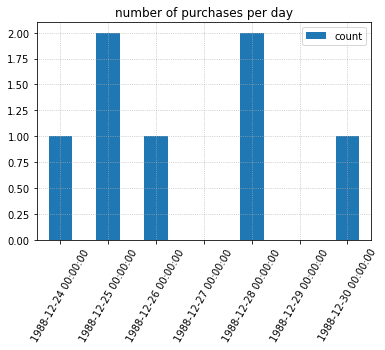

In [6]:
from IPython.display import display

df = pd.DataFrame({
    'item_id':[
        '273','231', '133', '555', '123','234','342'
    ],
    'purchase_date':[
        '1988-12-28', '1988-12-24', '1988-12-25', '1988-12-25', '1988-12-26', '1988-12-28' , '1988-12-30',
    ],
})


grouped_df = df.groupby('purchase_date').size().to_frame("count").reset_index()

display(grouped_df)

datetime_series = pd.to_datetime(grouped_df['purchase_date'])

datetime_index = pd.DatetimeIndex(datetime_series.values)

grouped_df.set_index(datetime_index, inplace=True)

grouped_df.sort_index(inplace=True)

grouped_df.plot(kind='bar', y='count', rot=60, title='number of purchases per day')

add_grid()

grouped_df_filled_missing = grouped_df.asfreq('D')

grouped_df_filled_missing.plot(kind='bar', y='count', rot=60, title='number of purchases per day')

add_grid()

## stacked bar plot count per date

<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


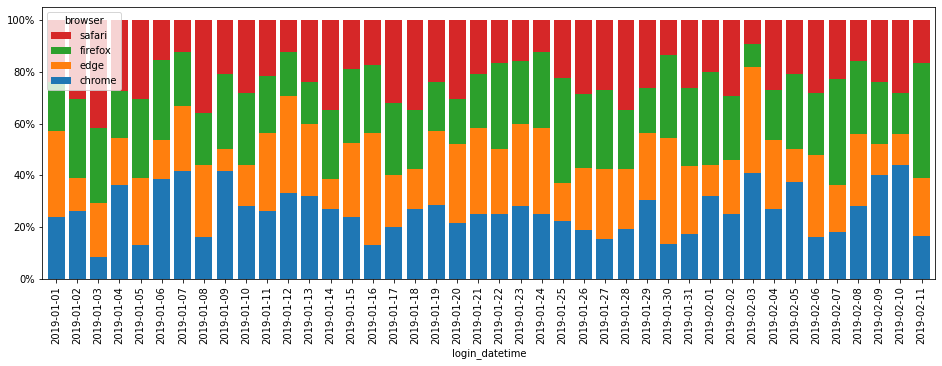

In [10]:
from datetime import date,datetime,timedelta

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np
import pandas as pd

np.random.seed(42)

# create a dummy dataset
df = pd.DataFrame(
    index=pd.to_datetime(
        [datetime(2019,1,1)+timedelta(hours=h+10*np.random.uniform()) for h in range(0,1000)]
    ),
    data={
        'browser': np.random.choice([
            'chrome',
            'firefox',
            'safari',
            'edge'
        ],size=1000,replace=True)
    },
    
)

print(type(df.index))
# 'pandas.core.indexes.datetimes.DatetimeIndex'

# just to make it more intuitive
df.index.name= 'login_datetime'

# you can pass a lambda function to the groupby function
# so that it groups by the day (or anything else you want)
df.groupby(by=[lambda dt: dt.strftime('%Y-%m-%d'),'browser']).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()
).unstack().plot(kind='bar',stacked=True,legend='reverse',width=0.8)

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.gcf().set_size_inches(16,5)
plt.show()